In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

228827136/228813984 [==============================] - 1s 0us/step


In [13]:
print(dataset_dir)
!ls -ltr /home/jupyter/.keras/datasets/flower_photos

data_dir = pathlib.Path(dataset_dir)


/home/jupyter/.keras/datasets/flower_photos
total 608
-rw-r----- 1 jupyter jupyter 418049 Feb  9  2016 LICENSE.txt
drwx------ 2 jupyter jupyter  40960 Feb 10  2016 tulips
drwx------ 2 jupyter jupyter  36864 Feb 10  2016 sunflowers
drwx------ 2 jupyter jupyter  36864 Feb 10  2016 roses
drwx------ 2 jupyter jupyter  49152 Feb 10  2016 dandelion
drwx------ 2 jupyter jupyter  36864 Feb 10  2016 daisy


In [15]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


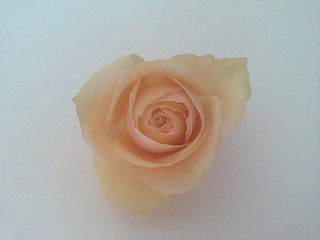

In [16]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(roses[0])

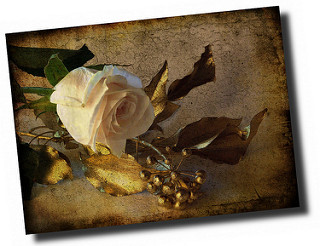

In [18]:
PIL.Image.open(str(roses[1]))

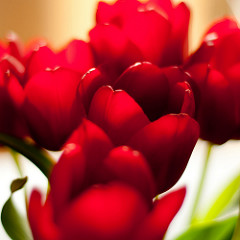

In [22]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [23]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(180,180),
    batch_size=32
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


2021-11-07 18:43:27.425909: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-07 18:43:27.434537: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(180,180),
    batch_size=32
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [25]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


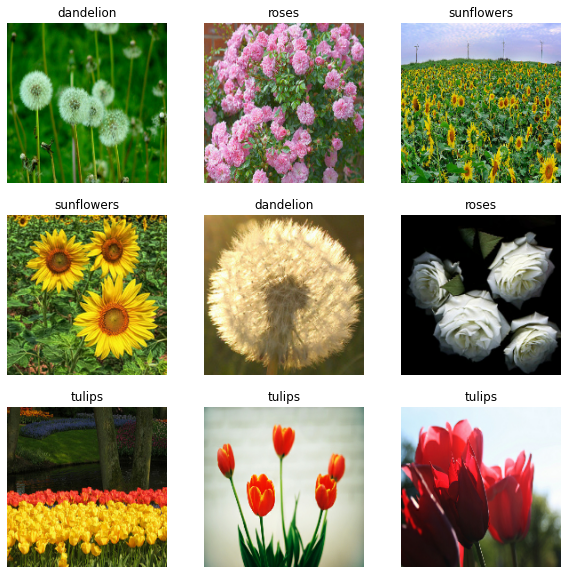

In [30]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180,180,3)),
    tf.keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)        0

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [42]:
history = model.fit(train_ds,
                   validation_data=test_ds,
                   epochs=10)

Epoch 1/10
92/92 [==============================] - 30s 314ms/step - loss: 1.2541 - accuracy: 0.4745 - val_loss: 1.1134 - val_accuracy: 0.5749
Epoch 2/10
92/92 [==============================] - 30s 326ms/step - loss: 0.9564 - accuracy: 0.6413 - val_loss: 0.9861 - val_accuracy: 0.6076
Epoch 3/10
92/92 [==============================] - 30s 320ms/step - loss: 0.7121 - accuracy: 0.7371 - val_loss: 0.8162 - val_accuracy: 0.6812
Epoch 4/10
92/92 [==============================] - 30s 329ms/step - loss: 0.5154 - accuracy: 0.8144 - val_loss: 0.8804 - val_accuracy: 0.6744
Epoch 5/10
92/92 [==============================] - 29s 311ms/step - loss: 0.3163 - accuracy: 0.8948 - val_loss: 1.0474 - val_accuracy: 0.6540
Epoch 6/10
92/92 [==============================] - 30s 323ms/step - loss: 0.1572 - accuracy: 0.9499 - val_loss: 1.3058 - val_accuracy: 0.6621
Epoch 7/10
92/92 [==============================] - 29s 311ms/step - loss: 0.1028 - accuracy: 0.9707 - val_loss: 1.2705 - val_accuracy: 0.6839

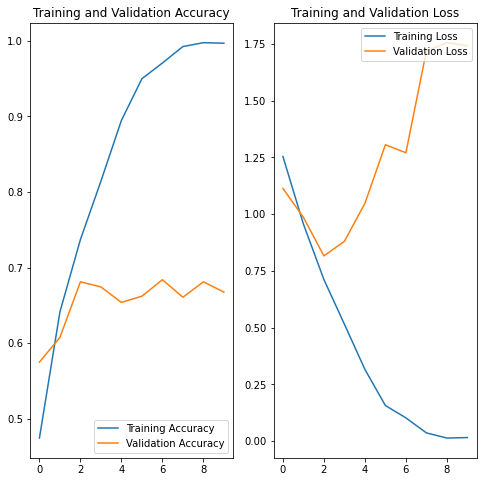

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
data_augmentation = tf.keras.models.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(180,
                                  180,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

model = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 45, 45, 64)       

In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(train_ds,
                   validation_data=test_ds,
                   epochs=15)

Epoch 1/15
92/92 [==============================] - 37s 397ms/step - loss: 1.3381 - accuracy: 0.4360 - val_loss: 1.0880 - val_accuracy: 0.5572
Epoch 2/15
92/92 [==============================] - 36s 395ms/step - loss: 1.0851 - accuracy: 0.5593 - val_loss: 1.0091 - val_accuracy: 0.5913
Epoch 3/15
92/92 [==============================] - 37s 397ms/step - loss: 0.9793 - accuracy: 0.6121 - val_loss: 1.0135 - val_accuracy: 0.6008
Epoch 4/15
92/92 [==============================] - 37s 397ms/step - loss: 0.9057 - accuracy: 0.6533 - val_loss: 0.9271 - val_accuracy: 0.6090
Epoch 5/15
92/92 [==============================] - 36s 395ms/step - loss: 0.8596 - accuracy: 0.6693 - val_loss: 0.8970 - val_accuracy: 0.6458
Epoch 6/15
92/92 [==============================] - 36s 390ms/step - loss: 0.8051 - accuracy: 0.6870 - val_loss: 0.8159 - val_accuracy: 0.6798
Epoch 7/15
92/92 [==============================] - 37s 400ms/step - loss: 0.7754 - accuracy: 0.6989 - val_loss: 0.8017 - val_accuracy: 0.6730

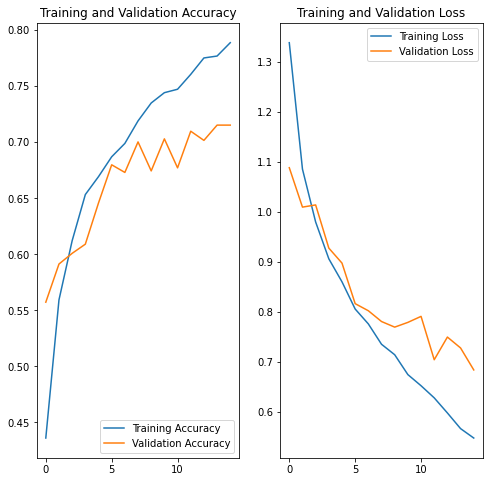

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [62]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions)

score = tf.nn.softmax(predictions[0])
print(score)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

[[4.5444466e-07 5.3501776e-06 4.6222142e-04 9.9304831e-01 6.4835427e-03]]
tf.Tensor([0.14911082 0.14911155 0.1491797  0.40251714 0.15008067], shape=(5,), dtype=float32)
This image most likely belongs to sunflowers with a 40.25 percent confidence.


/home/jupyter/.keras/datasets/Red_sunflower


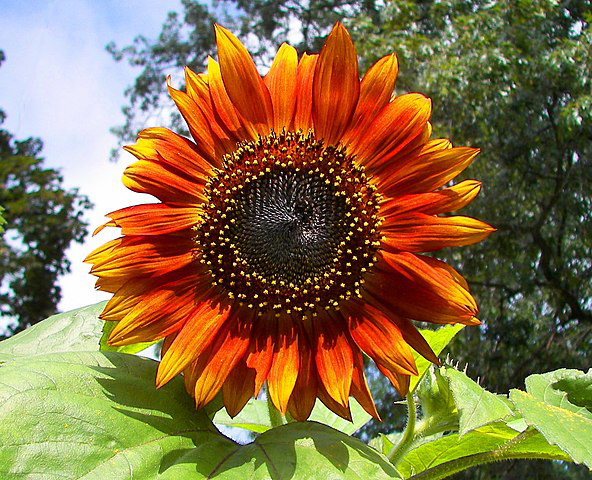

In [63]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

print(sunflower_path)
PIL.Image.open(str(sunflower_path))